### Apply data preprocessing and EDA


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
#upload dataset
dataset = pd.read_csv(r"C:\Users\ritik\OneDrive\Documents\New_synthetic_dataset.csv")
dataset.head()

,description,priority,assignee,due_date,status,created,task_category,estimated_effort_hrs,team
0,Fix bug in without module causing Sort person ...,Medium,Barbara Carroll,2025-05-16T19:42:34,To Do,2025-05-15T19:42:34,Bug Fix,2,Support
1,Implement new feature for other in the drug sy...,Low,Miranda Perez,2025-06-01T11:30:16,To Do,2025-05-27T11:30:16,Feature,4,HR
2,Optimize performance of small component.,Low,Miss Heather Freeman MD,2025-05-26T01:38:45,In Progress,2025-05-17T01:38:45,Other,8,DevOps
3,Test how functionality for send scenario.,Low,Barbara Carroll,2025-05-31T02:02:39,In Progress,2025-05-27T02:02:39,Testing,8,HR
4,Write documentation for bed.,Low,Colleen Armstrong,2025-05-23T01:23:12,In Progress,2025-05-21T01:23:12,Documentation,8,Product


In [3]:
#check missing values
dataset.isnull().sum()

description             0
priority                0
assignee                0
due_date                0
status                  0
created                 0
task_category           0
estimated_effort_hrs    0
team                    0
dtype: int64

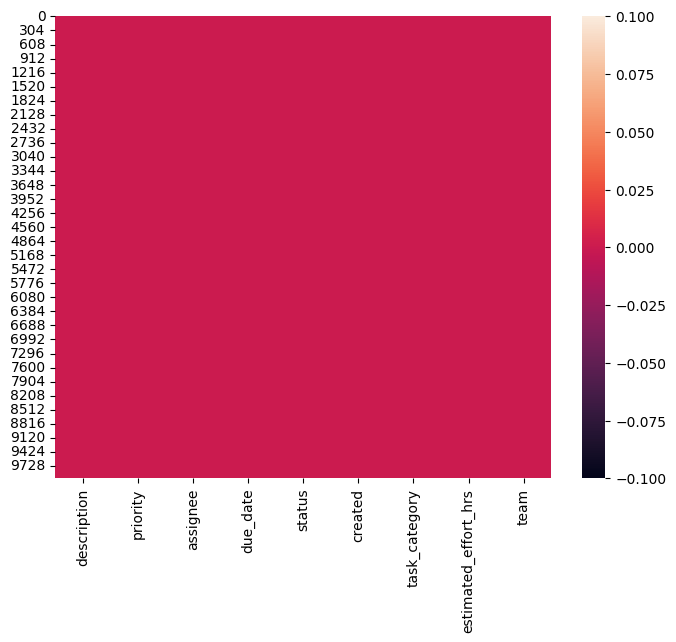

In [4]:
#heatmap for missing values
plt.figure(figsize=(8,6))
sns.heatmap(dataset.isnull())
plt.show()

In [5]:
#check datatypes
dataset.dtypes

description             object
priority                object
assignee                object
due_date                object
status                  object
created                 object
task_category           object
estimated_effort_hrs     int64
team                    object
dtype: object

In [6]:
dataset["created"] = pd.to_datetime(dataset["created"], errors="coerce")
dataset["due_date"] = pd.to_datetime(dataset["due_date"], errors="coerce")
dataset.head(5)

,description,priority,assignee,due_date,status,created,task_category,estimated_effort_hrs,team
0,Fix bug in without module causing Sort person ...,Medium,Barbara Carroll,2025-05-16 19:42:34,To Do,2025-05-15 19:42:34,Bug Fix,2,Support
1,Implement new feature for other in the drug sy...,Low,Miranda Perez,2025-06-01 11:30:16,To Do,2025-05-27 11:30:16,Feature,4,HR
2,Optimize performance of small component.,Low,Miss Heather Freeman MD,2025-05-26 01:38:45,In Progress,2025-05-17 01:38:45,Other,8,DevOps
3,Test how functionality for send scenario.,Low,Barbara Carroll,2025-05-31 02:02:39,In Progress,2025-05-27 02:02:39,Testing,8,HR
4,Write documentation for bed.,Low,Colleen Armstrong,2025-05-23 01:23:12,In Progress,2025-05-21 01:23:12,Documentation,8,Product


In [7]:
dataset["due_date"] = pd.to_numeric(dataset["due_date"], errors="coerce")
dataset["created"] = pd.to_numeric(dataset["created"], errors="coerce")
dataset.dtypes

description             object
priority                object
assignee                object
due_date                 int64
status                  object
created                  int64
task_category           object
estimated_effort_hrs     int64
team                    object
dtype: object

C:\Users\ritik\AppData\Local\Temp\ipykernel_24500\2641721176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index , palette= "Set2" )


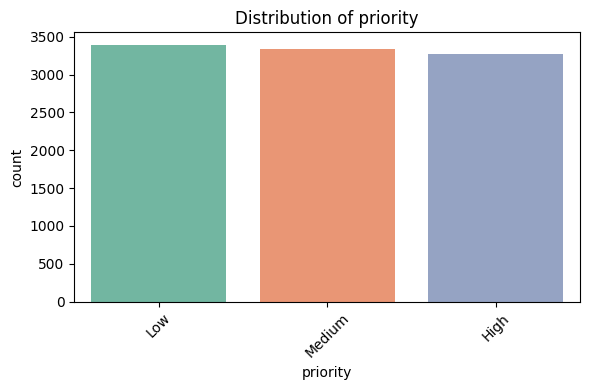

C:\Users\ritik\AppData\Local\Temp\ipykernel_24500\2641721176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index , palette= "Set2" )


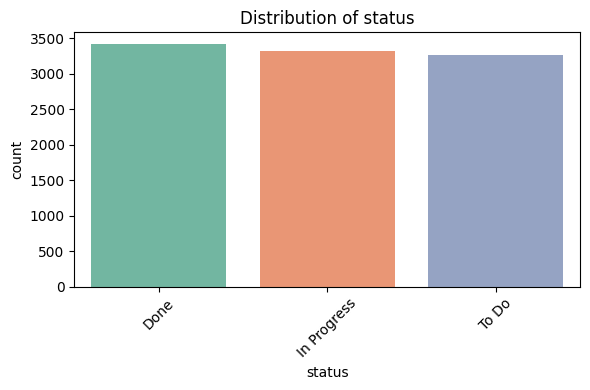

C:\Users\ritik\AppData\Local\Temp\ipykernel_24500\2641721176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index , palette= "Set2" )


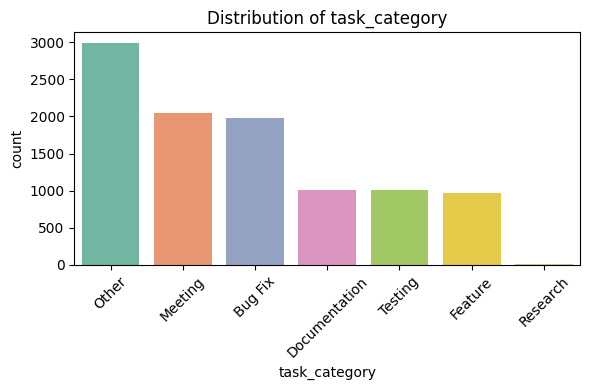

C:\Users\ritik\AppData\Local\Temp\ipykernel_24500\2641721176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index , palette= "Set2" )


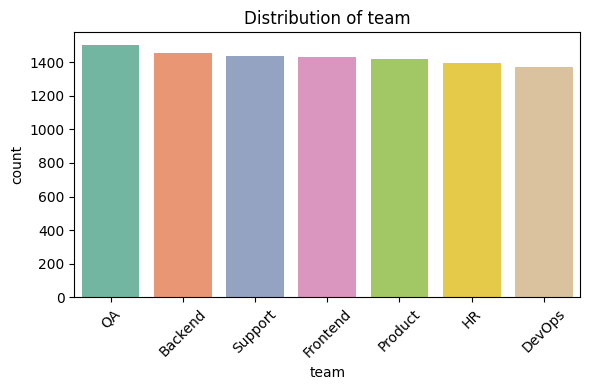

In [8]:
# 1. Distribution of categorical variables
categorical_cols = ['priority', 'status', 'task_category', 'team']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index , palette= "Set2" )
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

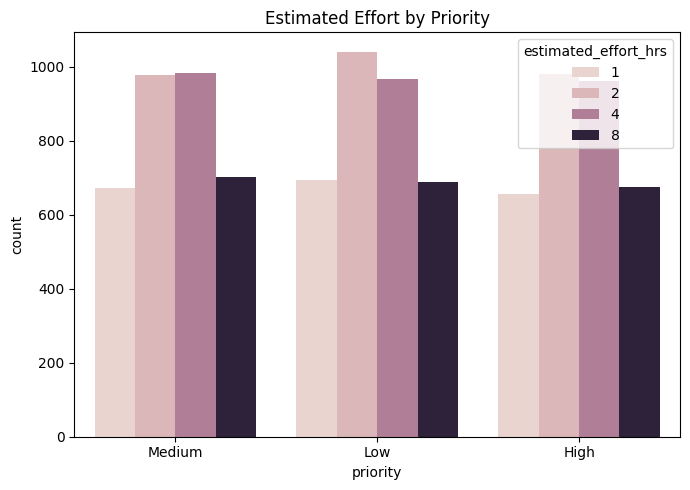

In [9]:
# 2. Estimated effort vs Priority
plt.figure(figsize=(7, 5))
sns.countplot(data=dataset, x='priority', hue='estimated_effort_hrs')
plt.title('Estimated Effort by Priority')
plt.tight_layout()
plt.show()

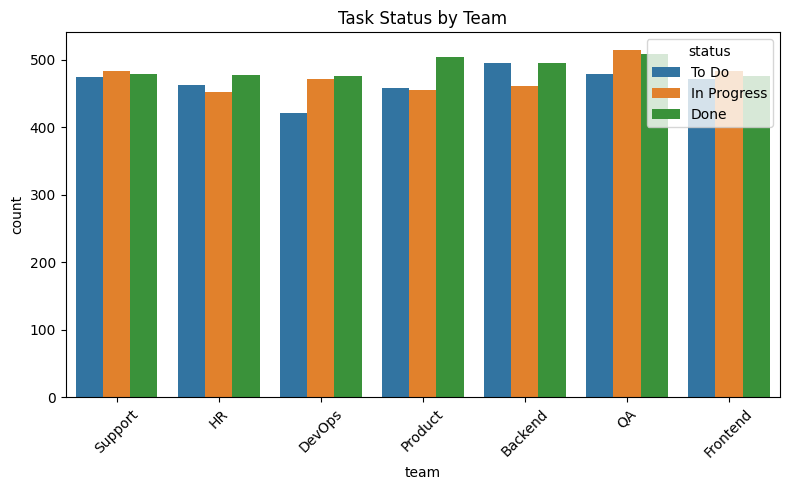

In [10]:
# 3. Status by Team
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='team', hue='status')
plt.title('Task Status by Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

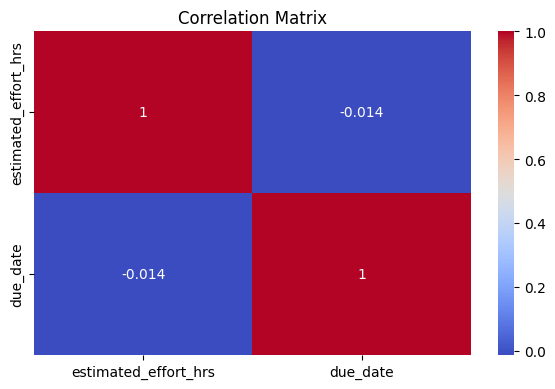

In [11]:
#4. Correlation heatmap (for numeric fields)
plt.figure(figsize=(6, 4))
sns.heatmap(dataset[['estimated_effort_hrs', 'due_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Apply NLP Preprocessing

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
dataset['cleaned_description'] = dataset['description'].apply(preprocess)
dataset[['description', 'cleaned_description']]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,description,cleaned_description
0,Fix bug in without module causing Sort person ...,fix bug without modul caus sort person approac...
1,Implement new feature for other in the drug sy...,implement new featur drug system
2,Optimize performance of small component.,optim perform small compon
3,Test how functionality for send scenario.,test function send scenario
4,Write documentation for bed.,write document bed
...,...,...
9995,Optimize performance of teach component.,optim perform teach compon
9996,Conduct code review for sort project.,conduct code review sort project
9997,Fix bug in high module causing Able determine..,fix bug high modul caus abl determin
9998,Test others functionality for this scenario.,test other function scenario


In [13]:
dataset.to_csv("preprocessed_data.csv" , index= False)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer()
# Fit and transform the cleaned descriptions
X = tfidf.fit_transform(dataset['cleaned_description'])


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dataset['status'])


In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')